### imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px 

In [2]:
album_df = pd.read_csv('data\\spotify_data_1001.csv')

## get_1001_albums stats

In [3]:
album_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1084 non-null   int64  
 1   spotify_id                     1084 non-null   object 
 2   artist                         1084 non-null   object 
 3   name                           1084 non-null   object 
 4   artist_origin                  1084 non-null   object 
 5   genres                         1084 non-null   object 
 6   sub_genres                     1084 non-null   object 
 7   releaseDate                    1084 non-null   int64  
 8   global_rating                  1084 non-null   float64
 9   release_date                   1084 non-null   object 
 10  release_date_precision         1084 non-null   object 
 11  popularity                     1084 non-null   int64  
 12  danceability_weighted_avg      1084 non-null   f

In [4]:
album_df = album_df.sort_values(by='releaseDate')

In [5]:
album_df['artist_origin'].value_counts()

artist_origin
us           532
uk           405
other        143
Not_Found      4
Name: count, dtype: int64

In [6]:
album_df[album_df['artist_origin'] == 'Not_Found']

,Unnamed: 0,spotify_id,artist,name,artist_origin,genres,sub_genres,releaseDate,global_rating,release_date,...,valence_difference,tempo_difference,mode_0,mode_1,pop_key,pop_key_used,pop_time_signature,pop_time_signature_used,duration,track_amount
826,826,24lX0YfUlQfqb2T2GioLji,Paul McCartney,McCartney,Not_Found,['rock'],"['album-rock', 'beatlesque', 'classic-rock', '...",1970,3.24,1970-04-17,...,0.521385,0.313629,0.048601,0.951399,7,0.230769,4,0.769231,2079812,13
992,992,5ESlb1RVMYfhixc1x8JRts,Einstürzende Neubauten,Kollaps,Not_Found,['rock'],"['experimental', 'experimental-rock', 'industr...",1981,1.85,1981-09-14,...,1.093283,0.355670,0.634421,0.365579,8,0.217391,4,0.695652,3371094,23
787,787,1DDsclE9PANAkXHyNjlDI4,N.E.R.D,Fly Or Die,Not_Found,"['hip-hop', 'rock']","['hip-hop', 'virginia-hip-hop', 'rap-rock', 'l...",2004,2.89,2004-01-01,...,0.341907,0.319971,0.614823,0.385177,9,0.250000,4,1.000000,3300894,12
767,767,6eSJ0lu0uwtiqXkP7Qrrno,Jack White,Blunderbuss,Not_Found,['rock'],"['alternative-rock', 'blues-rock', 'detroit-ro...",2012,3.41,2012-04-20,...,0.329087,0.219736,0.330471,0.669529,7,0.307692,4,0.846154,2514105,13


In [7]:
id_to_origin_map = {
    "24lX0YfUlQfqb2T2GioLji": "uk",
    "5ESlb1RVMYfhixc1x8JRts": "other",
    "1DDsclE9PANAkXHyNjlDI4": "us",
    "6eSJ0lu0uwtiqXkP7Qrrno": "us"
}

album_df['artist_origin'] = album_df.apply(
    lambda row: id_to_origin_map[row['spotify_id']] if row['spotify_id'] in id_to_origin_map else row['artist_origin'],
    axis=1
)

changed_rows = album_df[album_df['spotify_id'].isin(id_to_origin_map.keys())]
changed_rows[['spotify_id', 'artist_origin']]


,spotify_id,artist_origin
826,24lX0YfUlQfqb2T2GioLji,uk
992,5ESlb1RVMYfhixc1x8JRts,other
787,1DDsclE9PANAkXHyNjlDI4,us
767,6eSJ0lu0uwtiqXkP7Qrrno,us


In [8]:
album_df['artist_origin'].value_counts()

artist_origin
us       534
uk       406
other    144
Name: count, dtype: int64

In [9]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

album_df['decade'] = album_df['releaseDate'].apply(get_decade)

<Axes: xlabel='decade', ylabel='count'>

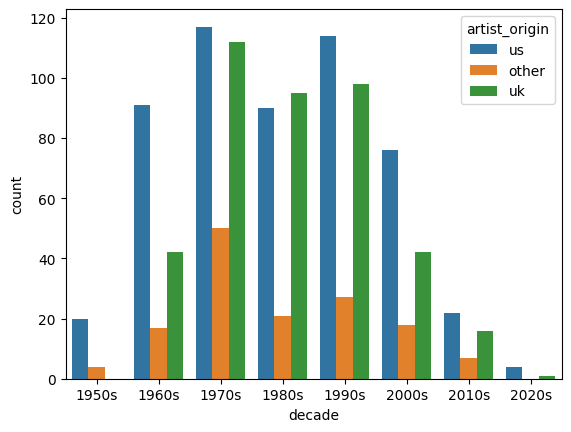

In [10]:
sns.countplot(album_df, x="decade", hue="artist_origin")

In [11]:
album_df[(album_df['releaseDate'] < 1960) & (album_df['artist_origin'] == 'other')]

,Unnamed: 0,spotify_id,artist,name,artist_origin,genres,sub_genres,releaseDate,global_rating,release_date,...,tempo_difference,mode_0,mode_1,pop_key,pop_key_used,pop_time_signature,pop_time_signature_used,duration,track_amount,decade
103,103,0yPE5s2h0XF9Umc6ENEKE8,Sabu,Palo Congo,other,"['world', 'jazz']",['pop-romantico'],1957,2.67,1957,...,0.180694,0.543730,0.456270,8,0.375000,4,0.75,2450827,8,1950s
940,940,4aSIyoC7BdDebquu0WgcFK,Ravi Shankar,The Sounds Of India,other,['world'],"['hindustani-classical', 'indian-classical', '...",1957,2.86,1957,...,0.113813,0.491795,0.508205,5,0.400000,4,0.80,3202200,5,1950s
570,570,1BHUIrORQwywRkl5cjapQz,Machito,Kenya,other,['jazz'],"['jazz-cubano', 'latin-jazz', 'mambo', 'musica...",1957,3.27,2000-01-25,...,0.175462,0.496925,0.503075,5,0.500000,4,1.00,2144333,12,1950s
489,489,1XjabdmwipT62cLSZV45SU,Tito Puente,Dance Mania,other,"['jazz', 'salsa']","['afro-cuban-percussion', 'jazz-puertorriqueno...",1958,3.26,1991-08-13,...,0.237410,0.518801,0.481199,7,0.166667,4,1.00,2293826,12,1950s


while being curious about non-us albums before 1960 I found out that the release date from spotify might be incorrect, so I'll drop it

In [12]:
album_df = album_df.drop(['Unnamed: 0', 'release_date', 'release_date_precision'], axis=1)

In [13]:
album_df.columns

Index(['spotify_id', 'artist', 'name', 'artist_origin', 'genres', 'sub_genres',
       'releaseDate', 'global_rating', 'popularity',
       'danceability_weighted_avg', 'energy_weighted_avg',
       'loudness_weighted_avg', 'speechiness_weighted_avg',
       'acousticness_weighted_avg', 'instrumentalness_weighted_avg',
       'liveness_weighted_avg', 'valence_weighted_avg', 'tempo_weighted_avg',
       'danceability_difference', 'energy_difference', 'loudness_difference',
       'speechiness_difference', 'acousticness_difference',
       'instrumentalness_difference', 'liveness_difference',
       'valence_difference', 'tempo_difference', 'mode_0', 'mode_1', 'pop_key',
       'pop_key_used', 'pop_time_signature', 'pop_time_signature_used',
       'duration', 'track_amount', 'decade'],
      dtype='object')

In [14]:
sound_features = ['acousticness_weighted_avg', 'danceability_weighted_avg', 'energy_weighted_avg', 'instrumentalness_weighted_avg', 'liveness_weighted_avg', 'valence_weighted_avg']
year_data = album_df.groupby('releaseDate')[sound_features].mean()
year_data = year_data.reset_index()
year_data.head()


,releaseDate,acousticness_weighted_avg,danceability_weighted_avg,energy_weighted_avg,instrumentalness_weighted_avg,liveness_weighted_avg,valence_weighted_avg
0,1955,0.881690,0.294238,0.088780,0.000361,0.173091,0.156313
1,1956,0.661118,0.547448,0.396251,0.041872,0.230444,0.617269
2,1957,0.736852,0.555781,0.436555,0.177825,0.208465,0.628771
3,1958,0.771803,0.489765,0.353948,0.217851,0.196977,0.505710
4,1959,0.782785,0.485863,0.273378,0.073988,0.167311,0.426337


In [15]:

fig = px.line(year_data, x='releaseDate', y=sound_features)
fig.show()

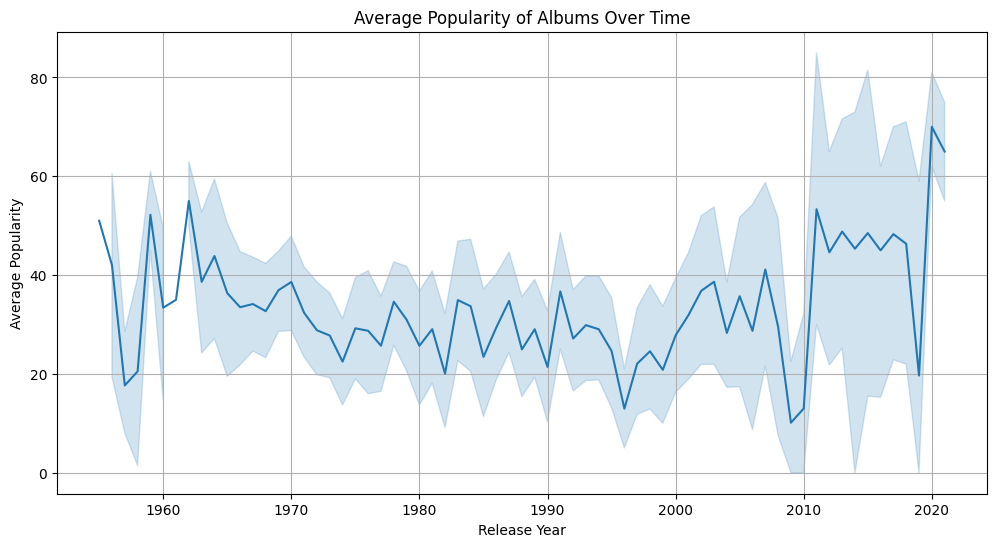

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='releaseDate', y='popularity', data=album_df, estimator='mean')
plt.title('Average Popularity of Albums Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

In [17]:
album_df.columns

Index(['spotify_id', 'artist', 'name', 'artist_origin', 'genres', 'sub_genres',
       'releaseDate', 'global_rating', 'popularity',
       'danceability_weighted_avg', 'energy_weighted_avg',
       'loudness_weighted_avg', 'speechiness_weighted_avg',
       'acousticness_weighted_avg', 'instrumentalness_weighted_avg',
       'liveness_weighted_avg', 'valence_weighted_avg', 'tempo_weighted_avg',
       'danceability_difference', 'energy_difference', 'loudness_difference',
       'speechiness_difference', 'acousticness_difference',
       'instrumentalness_difference', 'liveness_difference',
       'valence_difference', 'tempo_difference', 'mode_0', 'mode_1', 'pop_key',
       'pop_key_used', 'pop_time_signature', 'pop_time_signature_used',
       'duration', 'track_amount', 'decade'],
      dtype='object')

In [18]:
avg_sound_features = ['global_rating', 'popularity',
       'danceability_weighted_avg', 'energy_weighted_avg',
       'loudness_weighted_avg', 'speechiness_weighted_avg',
       'acousticness_weighted_avg', 'instrumentalness_weighted_avg',
       'liveness_weighted_avg', 'valence_weighted_avg', 'tempo_weighted_avg',
       'duration', 'track_amount']

In [19]:
dif_sound_features = ['global_rating', 'popularity', 'danceability_difference', 'energy_difference', 'loudness_difference',
       'speechiness_difference', 'acousticness_difference',
       'instrumentalness_difference', 'liveness_difference',
       'valence_difference', 'tempo_difference', 'duration', 'track_amount']

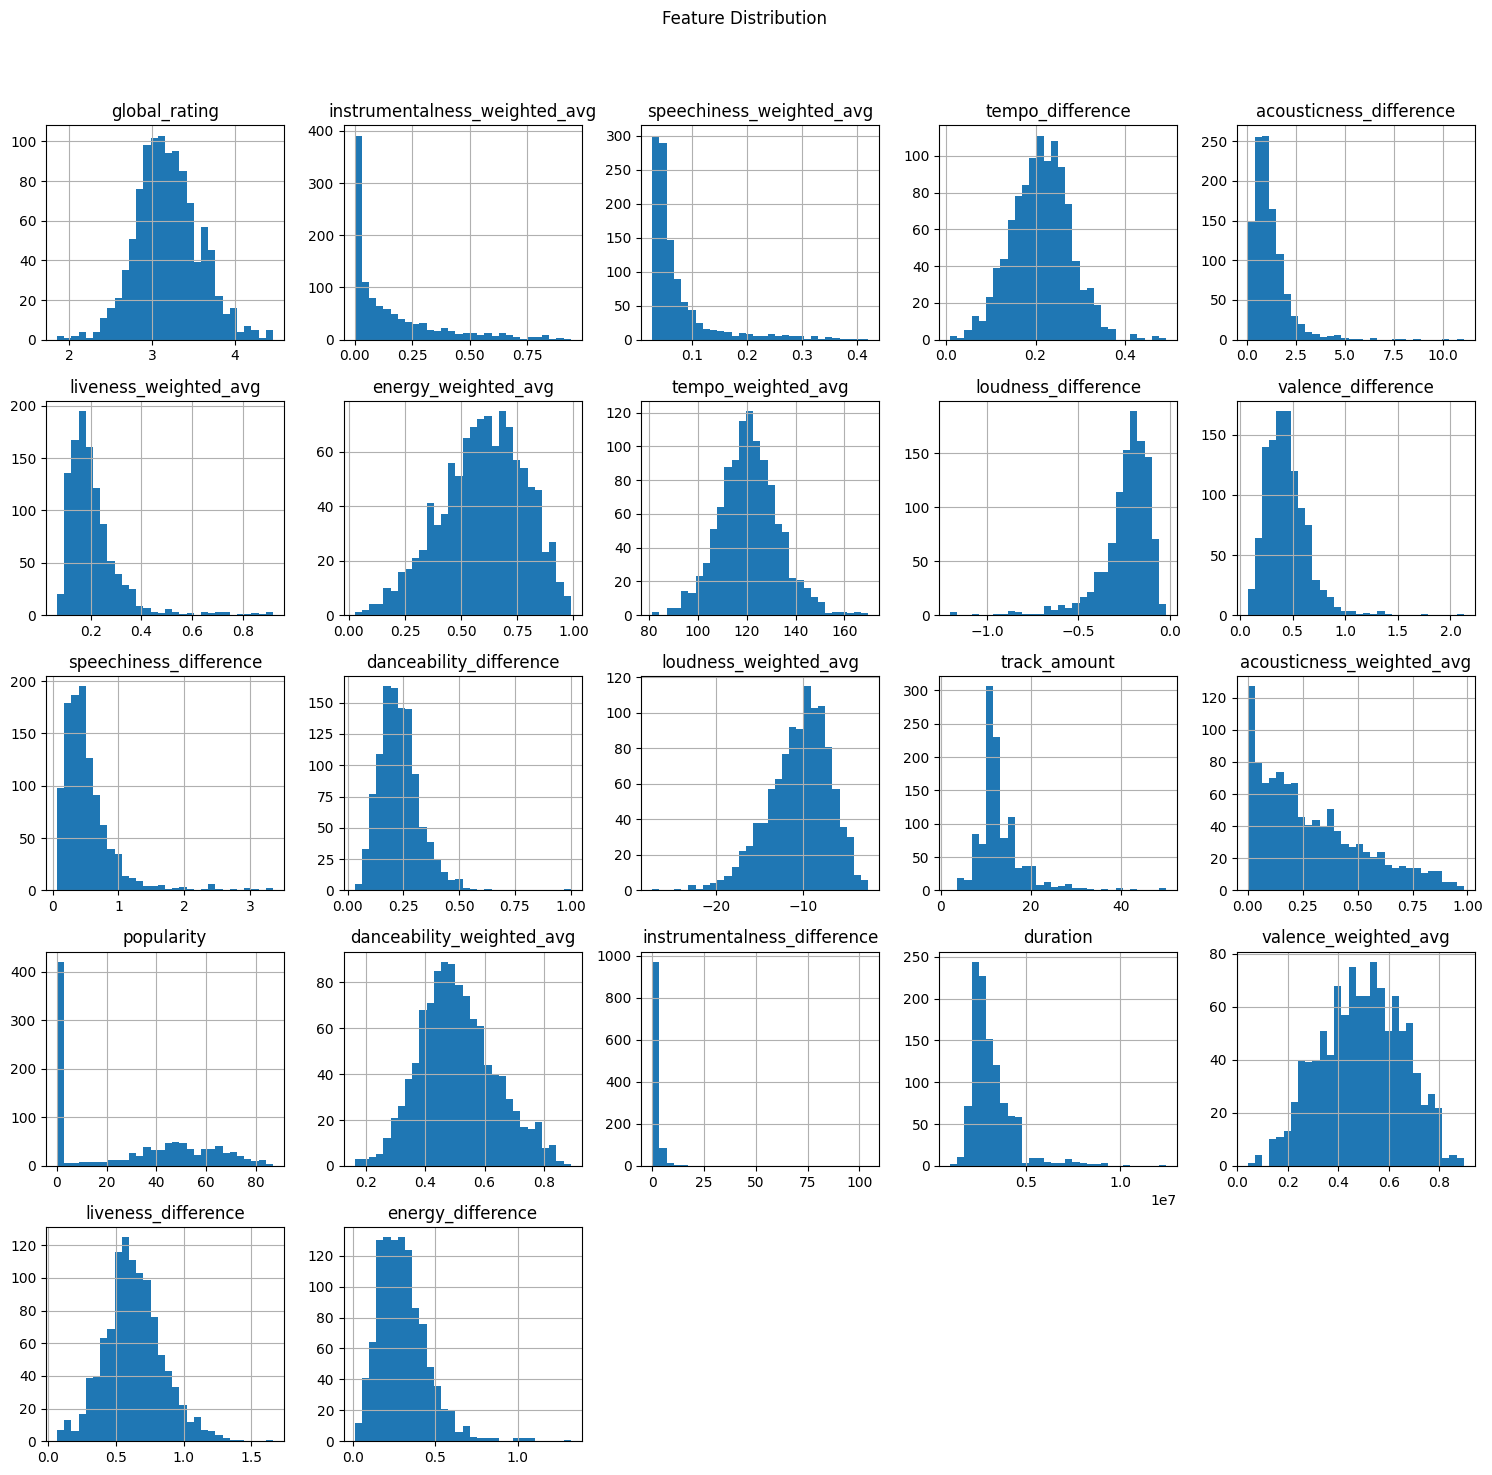

In [20]:
album_df[list(set(avg_sound_features+dif_sound_features))].hist(bins=30, figsize=(15, 15), layout=(5, 5))

plt.suptitle('Feature Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [21]:
album_df['instrumentalness_weighted_avg'].describe()

count    1084.000000
mean        0.160733
std         0.201403
min         0.000000
25%         0.010466
50%         0.076499
75%         0.236883
max         0.938521
Name: instrumentalness_weighted_avg, dtype: float64

maybe we'll might delete intrumentalness_difference column, because most of the albums are rather fully instumental rather fully vocal (except for 1-2 tracks, which caused that plot of instrumentalness_difference). also we might change instrumentalness to boolean based on spotify documentation: "Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0."

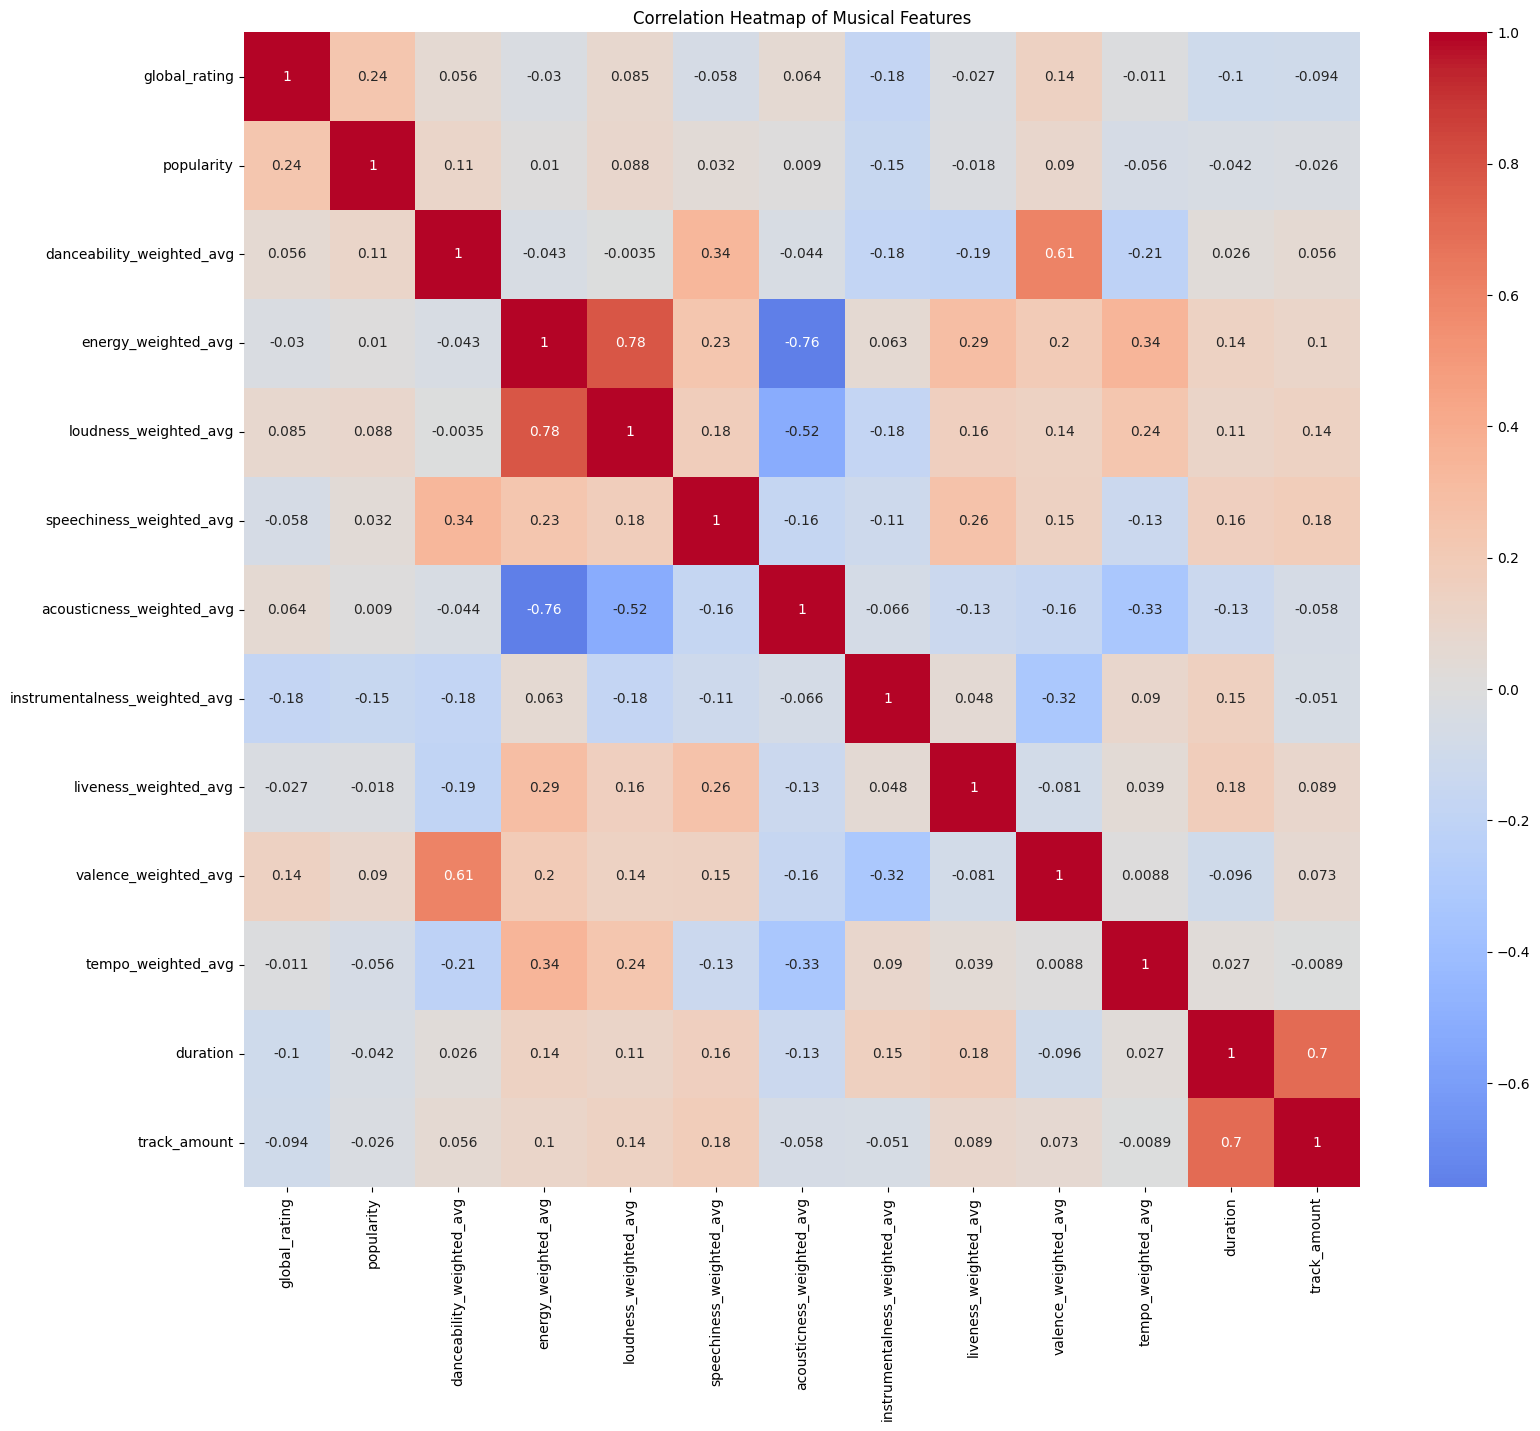

In [22]:
correlation_matrix_1 = album_df[avg_sound_features].corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Musical Features')
plt.show()

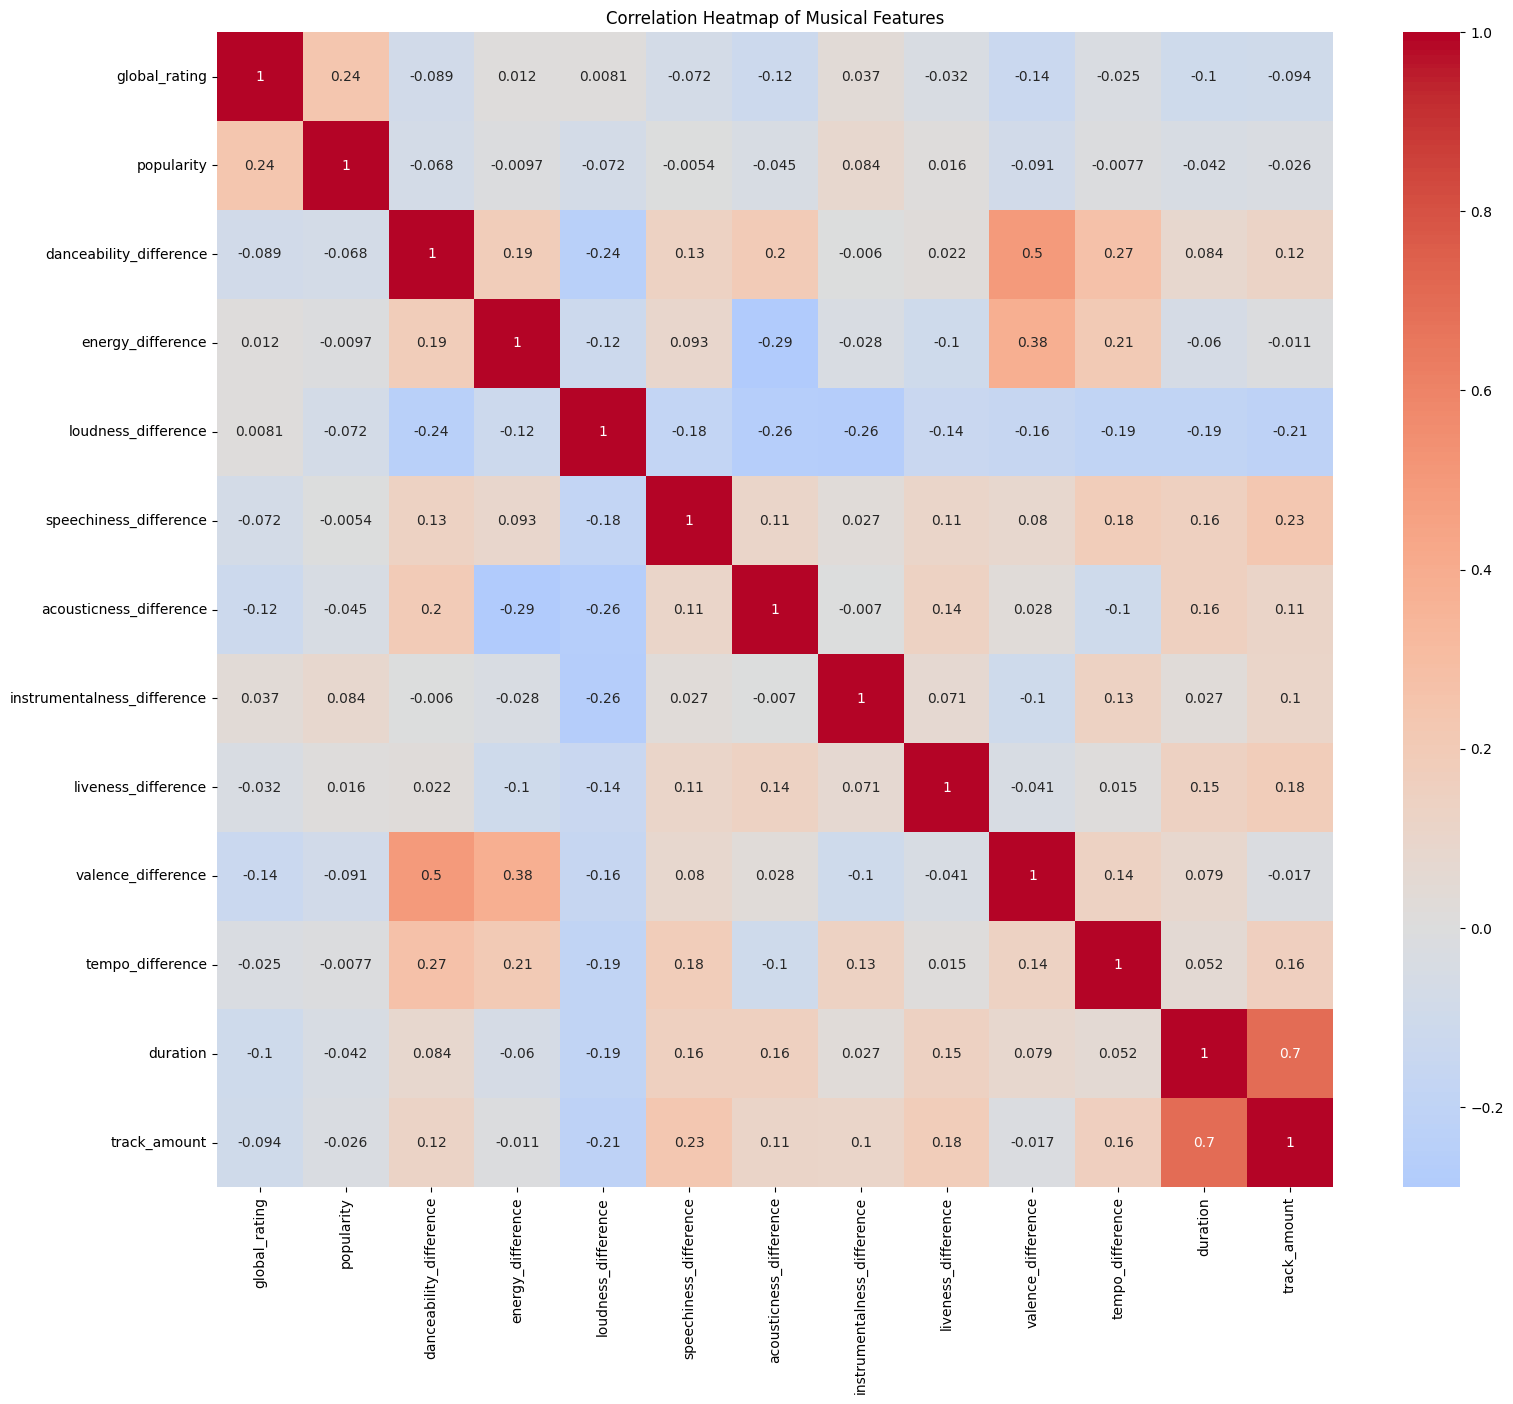

In [23]:
correlation_matrix_2 = album_df[dif_sound_features].corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Musical Features')
plt.show()

In [24]:
radiohead = album_df[album_df['artist'] == 'Radiohead']

In [25]:
radiohead[avg_sound_features]['valence_weighted_avg'].describe()

count    6.000000
mean     0.322307
std      0.078838
min      0.214481
25%      0.272335
50%      0.319913
75%      0.381385
max      0.421184
Name: valence_weighted_avg, dtype: float64

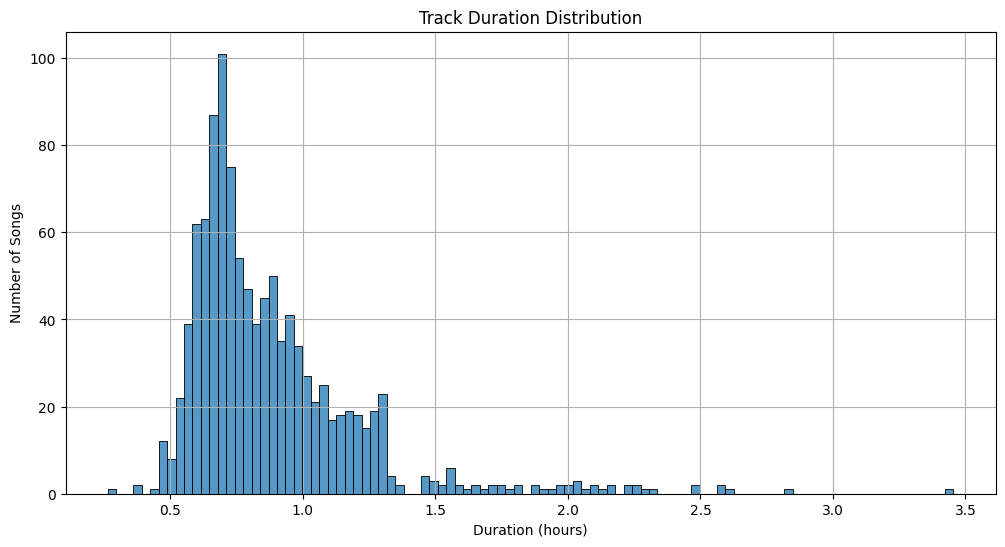

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(album_df['duration'] / 3600000, bins=100) 
plt.title('Album Duration Distribution')
plt.xlabel('Duration (hours)')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()

In [28]:
genres_data = album_df
genres_data['genres'] = genres_data['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

genres_expanded = genres_data['genres'].apply(pd.Series)
genres_expanded.columns = [f'genre_{i+1}' for i in genres_expanded.columns]

genres_data = pd.concat([genres_data, genres_expanded], axis=1)
genres_melted = genres_data.melt(
    id_vars=avg_sound_features,
    value_vars=[f'genre_{i+1}' for i in range(genres_expanded.shape[1])],
    value_name='genre'
).drop(columns=['variable'])
genres_aggregated = genres_melted.dropna(subset=['genre']).groupby('genre')[avg_sound_features].mean()
genres_aggregated.head(2)

,global_rating,popularity,danceability_weighted_avg,energy_weighted_avg,loudness_weighted_avg,speechiness_weighted_avg,acousticness_weighted_avg,instrumentalness_weighted_avg,liveness_weighted_avg,valence_weighted_avg,tempo_weighted_avg,duration,track_amount
genre,,,,,,,,,,,,,
blues,3.267037,25.962963,0.503072,0.502831,-11.855305,0.072088,0.484555,0.142596,0.256370,0.579445,116.915788,2.965702e+06,12.666667
britpop,3.202174,25.652174,0.393609,0.700980,-7.967762,0.052092,0.122380,0.134842,0.208016,0.414877,126.379637,3.480559e+06,14.304348


In [29]:
all_genres = pd.Series(genres_data[['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6']].values.ravel())
all_genres = all_genres.dropna()
genre_counts = all_genres.value_counts()

genre_counts


rock                 585
pop                  214
indie                128
folk                 114
psychedelic-rock     109
singer-songwriter    100
new-wave              94
hip-hop               86
electronica           85
hard-rock             73
soul                  71
country               65
punk                  63
jazz                  57
metal                 56
post-punk             51
funk                  43
world                 28
blues                 27
britpop               23
grunge                16
shoegaze              15
reggae                10
rock-and-roll          8
samba                  7
salsa                  2
Name: count, dtype: int64

In [30]:
genres_aggregated.reset_index(inplace=True)

In [31]:
fig = px.bar(genres_aggregated, x='genre', y=['valence_weighted_avg', 'energy_weighted_avg', 'danceability_weighted_avg', 'acousticness_weighted_avg', 'instrumentalness_weighted_avg', 'liveness_weighted_avg'], barmode='group')
fig.show()

In [32]:
fig = px.bar(genres_aggregated, x='genre', y='global_rating')
fig.show()

In [33]:
fig = px.bar(genres_aggregated, x='genre', y='tempo_weighted_avg')
fig.show()

In [34]:
px.scatter(album_df,x='releaseDate',y='global_rating',color='releaseDate',color_continuous_scale=px.colors.sequential.Plasma,template='plotly_dark',title='Release Year Versus Rating')

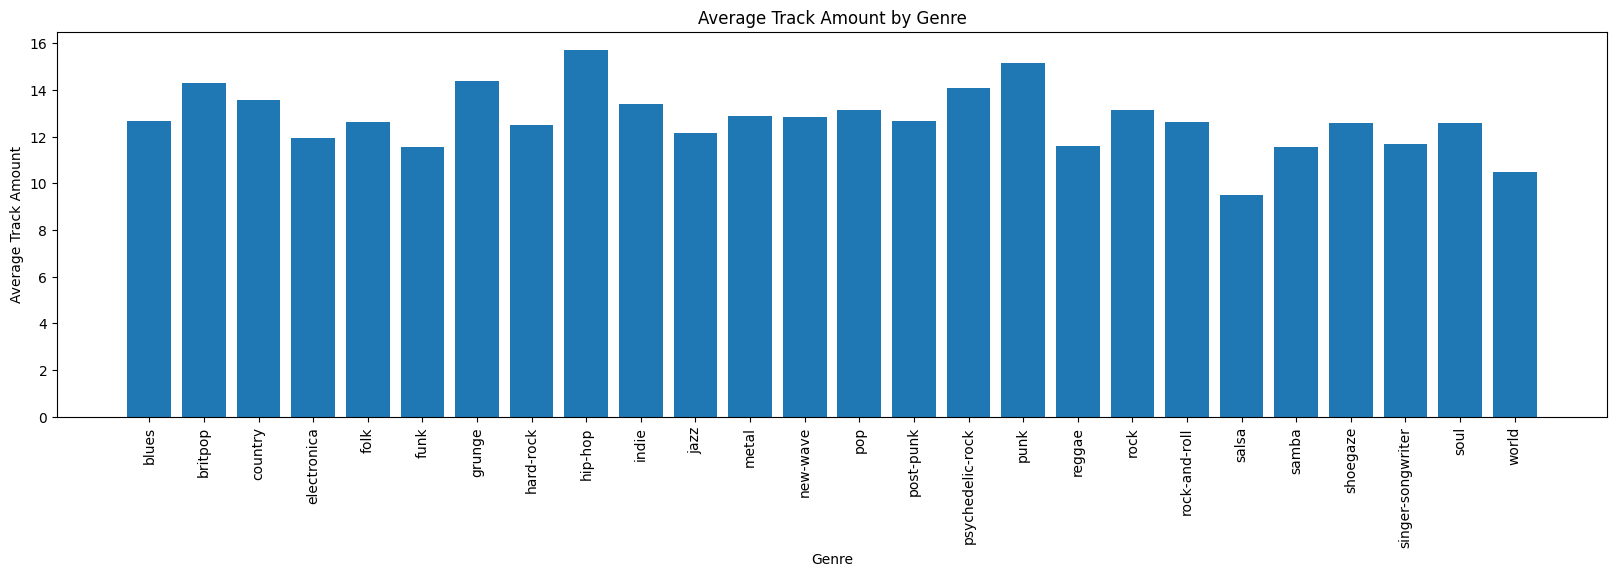

In [35]:
plt.figure(figsize=(20, 5))
plt.bar(genres_aggregated['genre'], genres_aggregated['track_amount'])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Track Amount')
plt.title('Average Track Amount by Genre')
plt.show()

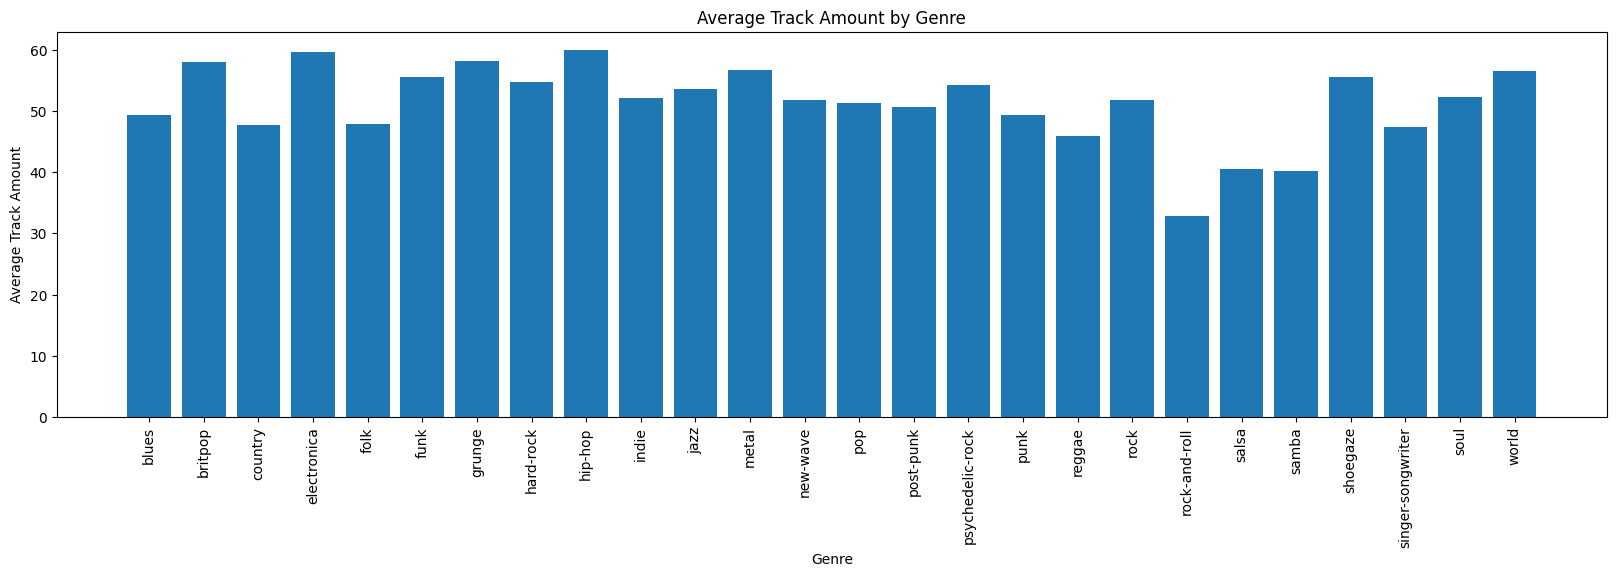

In [36]:
plt.figure(figsize=(20, 5))
plt.bar(genres_aggregated['genre'], genres_aggregated['duration'] / 60000)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Track Amount')
plt.title('Average Track Amount by Genre')
plt.show()

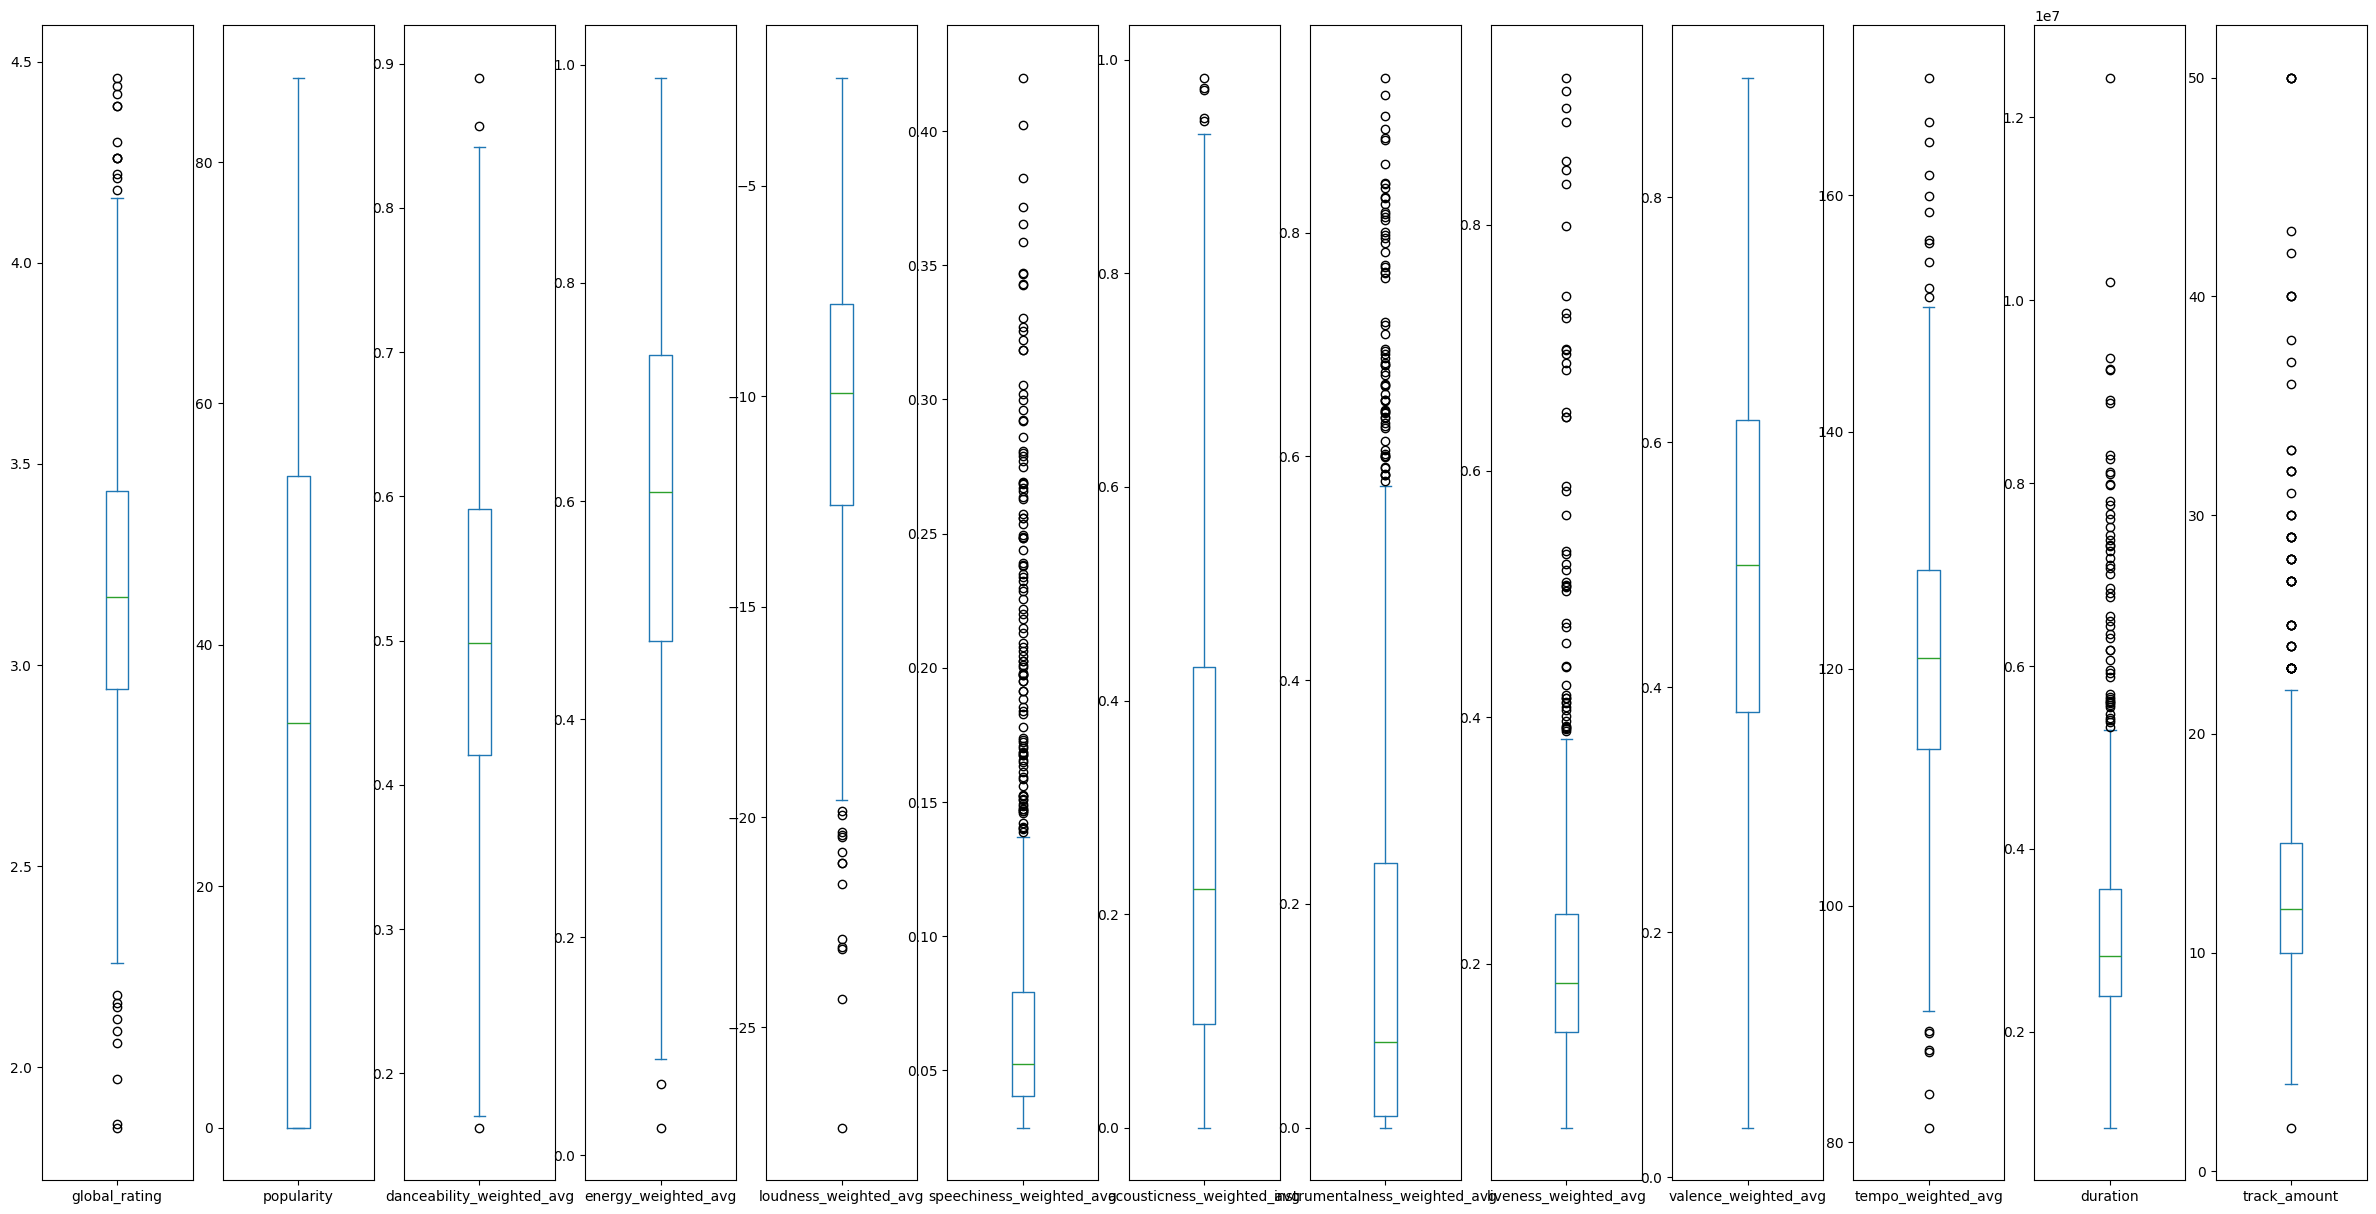

In [37]:
album_df[avg_sound_features].plot(kind='box', subplots=True)
plt.gcf().set_size_inches(30,15)
plt.show()

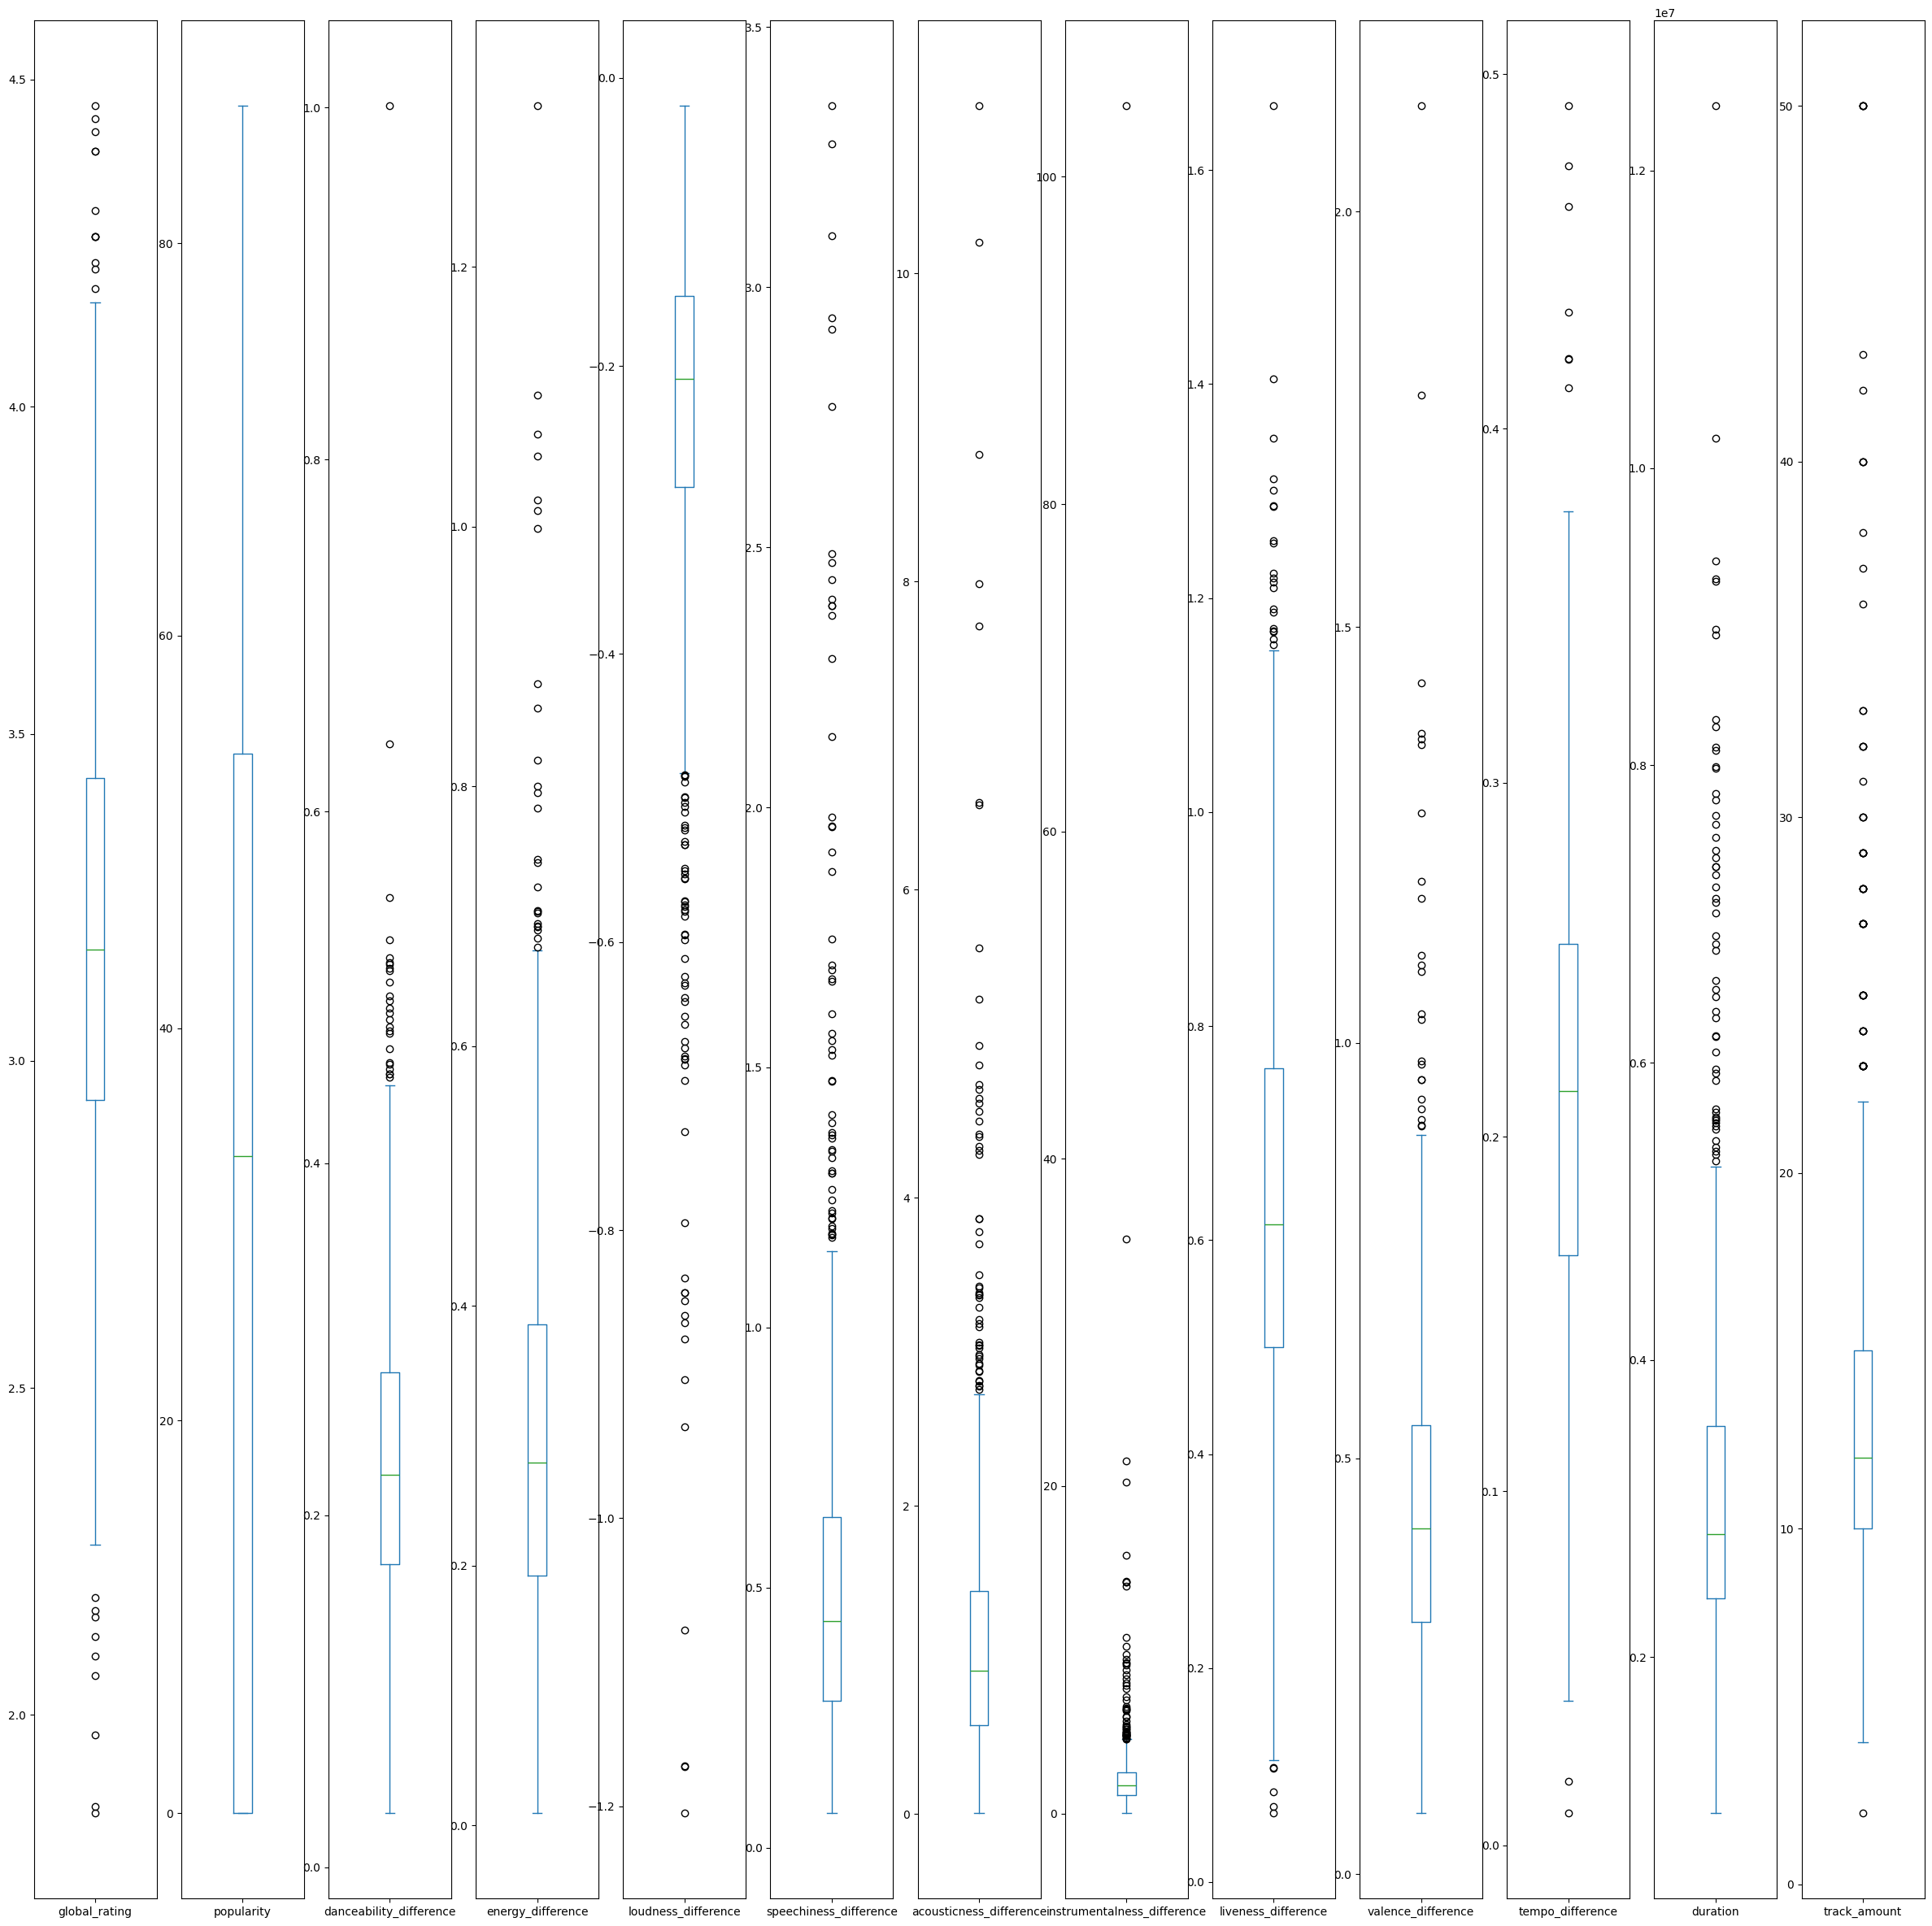

In [38]:
album_df[dif_sound_features].plot(kind='box', subplots=True)
plt.gcf().set_size_inches(30,30)
plt.show()

In [46]:
all_genres

0                    jazz
6                    rock
7           rock-and-roll
12                   folk
13                country
              ...        
6486                  pop
6492                  pop
6493    singer-songwriter
6494                 folk
6498              hip-hop
Length: 2130, dtype: object

In [64]:
all_genres.value_counts().sum()

np.int64(2130)

In [83]:
import plotly.express as px

genre_columns = ['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6']
genre_data = genres_data[genre_columns].apply(pd.Series.value_counts).sum(axis=1).reset_index()
genre_data.columns = ['Genre', 'Count']

fig = px.treemap(
    genre_data,
    path=['Genre'],
    values='Count',
)

fig.update_traces(
    texttemplate="<b>%{label}</b><br>%{value}",
    textfont=dict(size=24), 
    textposition='middle center'
)
fig.update_layout(
    width=1920/2, 
    height=1200/2,  
    margin=dict(t=0, l=0, r=0, b=0)
)
fig.show()

TypeError: normalize_sizes() got an unexpected keyword argument 'width'

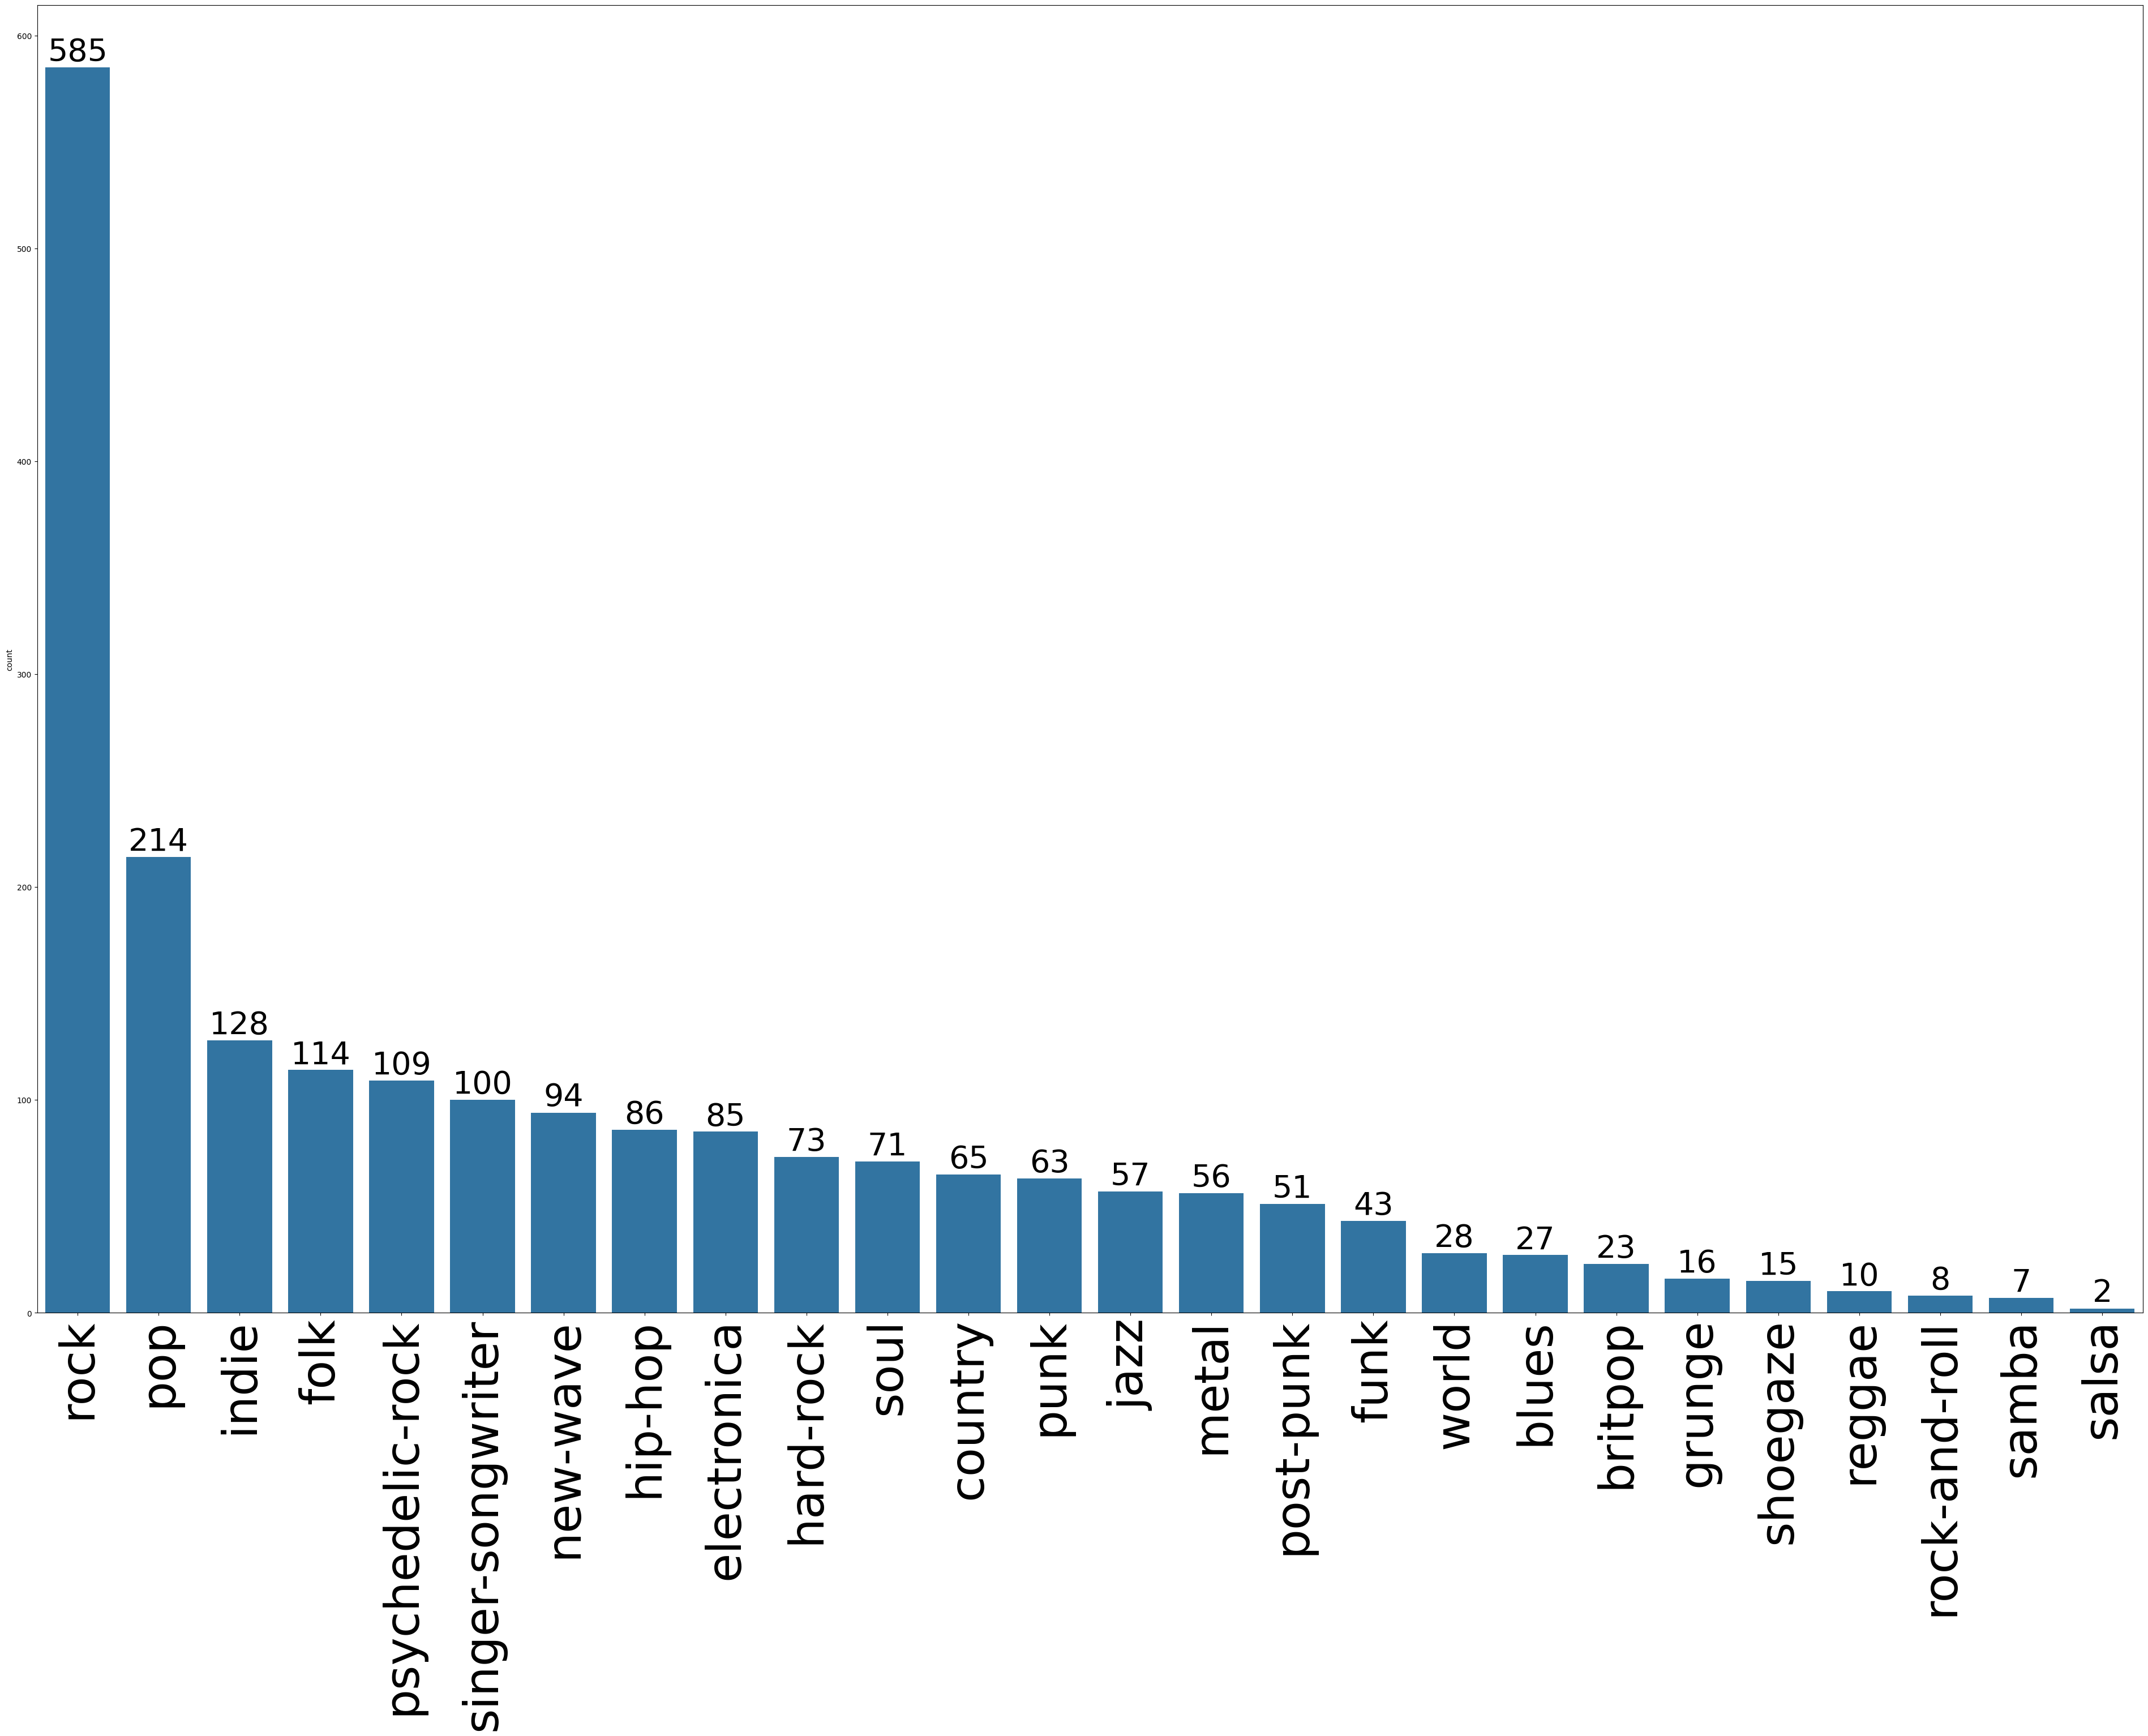

In [60]:
plt.figure(figsize=(192/4, 120/4))
ax = sns.barplot(all_genres.value_counts())
ax.bar_label(ax.containers[0], fontsize=40)
plt.xticks(rotation=90, fontsize=60)
plt.show()

In [39]:
album_df[avg_sound_features].describe()

,global_rating,popularity,danceability_weighted_avg,energy_weighted_avg,loudness_weighted_avg,speechiness_weighted_avg,acousticness_weighted_avg,instrumentalness_weighted_avg,liveness_weighted_avg,valence_weighted_avg,tempo_weighted_avg,duration,track_amount
count,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1.084000e+03,1084.000000
mean,3.191651,30.155904,0.509566,0.596285,-10.405344,0.074671,0.288825,0.160733,0.210172,0.495395,120.971150,3.168232e+06,13.052583
std,0.384837,27.748618,0.127569,0.184735,3.575025,0.060971,0.235922,0.201403,0.109407,0.161474,12.189893,1.205536e+06,5.512514
min,1.850000,0.000000,0.162258,0.025424,-27.380588,0.028711,0.000026,0.000000,0.066970,0.040322,81.245767,9.520000e+05,2.000000
25%,2.940000,0.000000,0.420502,0.471639,-12.589098,0.040506,0.097414,0.010466,0.144903,0.379928,113.181309,2.395947e+06,10.000000
50%,3.170000,33.500000,0.498413,0.608588,-9.934108,0.052504,0.223204,0.076499,0.184751,0.500060,120.903396,2.830502e+06,12.000000
75%,3.432500,54.000000,0.591066,0.733648,-7.814070,0.079179,0.430952,0.236883,0.240522,0.618362,128.363036,3.557857e+06,15.000000
max,4.460000,87.000000,0.890340,0.988179,-2.430182,0.419884,0.983301,0.938521,0.919222,0.897753,169.916998,1.243547e+07,50.000000


In [40]:
album_df[(album_df['instrumentalness_weighted_avg'] > 0.75) & (album_df['instrumentalness_weighted_avg'] < 0.9)][['artist', 'name', 'instrumentalness_weighted_avg', 'instrumentalness_difference']]

,artist,name,instrumentalness_weighted_avg,instrumentalness_difference
852,Bill Evans Trio,Sunday At The Village Vanguard,0.884168,0.044376
822,Booker T. & The MG's,Green Onions,0.795481,0.167216
480,Hugh Masekela,Home Is Where The Music Is,0.825926,0.172202
386,Can,Future Days,0.882524,0.039475
404,Incredible Bongo Band,Bongo Rock,0.800876,0.196402
410,Neu!,NEU! 75,0.830502,0.105334
466,Keith Jarrett,The Köln Concert,0.831701,0.064671
1056,Penguin Cafe Orchestra,Music From The Penguin Cafe,0.763561,0.397843
279,Kraftwerk,The Man Machine,0.759687,0.127395
597,My Bloody Valentine,Isn't Anything,0.782663,0.270518


that is veeeeeery strange that for example Penguin Cafe Orchestra is more probable to have vocals than my bloody valentines albums and the feature seemed to be noisy before (i planned to change it to boolean, but because of the reason above that won't be accurate until i'll check manually :( )

In [41]:
album_df[(album_df['liveness_weighted_avg'] > 0.5) & (album_df['liveness_weighted_avg'] < 0.54)][['spotify_id', 'artist', 'name', 'liveness_weighted_avg', 'liveness_difference', 'track_amount']]

,spotify_id,artist,name,liveness_weighted_avg,liveness_difference,track_amount
1082,0t41BkcZayaAsa0FdRelfz,Duke Ellington,Ellington at Newport,0.519203,0.561870,38
852,3uwufR7PwniMX7t3v4I5oB,Bill Evans Trio,Sunday At The Village Vanguard,0.506754,0.497275,10
191,47inaDdXEosHHrQc2nT7aK,Love,Da Capo,0.524113,0.475479,7
1,4TJIdlY9hGSSTO1kUs1neh,Johnny Cash,At Folsom Prison,0.507332,0.469387,16
1037,7qFad1a6Q3kUJ1oAz6fT9m,"Blood, Sweat & Tears","Blood, Sweat & Tears",0.505875,0.489040,12
671,3DNeMApEMCo4IDXNMYnlFi,Iron Maiden,Iron Maiden,0.502336,0.540963,8
445,6S4f7yDtJlS0iQMEuCtIF0,Malcolm McLaren,Duck Rock,0.509521,0.487916,12
632,4PqSk2iBHnsYQK0ecXjS9k,Megadeth,Peace Sells...But Who's Buying,0.534900,0.687514,21
89,2wz3P1w89gQd3iXdmF1IA5,Ministry,KE*A*H** (Psalm 69),0.532171,0.570782,9


In [42]:
album_df[album_df['artist'] == 'Nirvana'][['spotify_id', 'artist', 'name', 'liveness_weighted_avg', 'liveness_difference', 'track_amount']]

,spotify_id,artist,name,liveness_weighted_avg,liveness_difference,track_amount
181,2UJcKiJxNryhL050F5Z1Fk,Nirvana,Nevermind,0.129061,0.532821,13
724,7wOOA7l306K8HfBKfPoafr,Nirvana,In Utero,0.160300,0.477559,12
14,5pbjLidJuoty9QUOy6X682,Nirvana,MTV Unplugged In New York,0.372268,0.772700,14


same for liveness... (Unplugged and Peace Sells...But Who's Buying as examples) There are no more than 50 albums (<5%) which are live based on googling, so that we'll drop it too  

In [43]:
album_df = album_df.drop(columns=['popularity', 'instrumentalness_weighted_avg', 'instrumentalness_difference', 'liveness_weighted_avg', 'liveness_difference'])